F1 Predict Project

## Data import

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [432]:
# Racing stats

race = pd.read_csv('Race_base.csv', names = ['pos', 'no', 'driver', 'team', 'laps', 
                                             'time', 'points', 'race_no', 'season', 'track'], skiprows = [0])
race.drop(['no', 'points'], axis = 1, inplace = True)
race.head()

,pos,driver,team,laps,time,race_no,season,track
0,1,Sebastian Vettel,FERRARI,57,1:24:11.672,1,2017,Albert Park
1,2,Lewis Hamilton,MERCEDES,57,+9.975s,1,2017,Albert Park
2,3,Valtteri Bottas,MERCEDES,57,+11.250s,1,2017,Albert Park
3,4,Kimi Räikkönen,FERRARI,57,+22.393s,1,2017,Albert Park
4,5,Max Verstappen,RED BULL RACING TAG HEUER,57,+28.827s,1,2017,Albert Park


In [433]:
# Qualification results dataset

qual = pd.read_csv('Quali_base.csv', names = ['pos', 'no', 'driver', 'team', 'q1', 'q2', 'q3', 'laps', 'race_no', 'season', 'track'],
                   skiprows = [0])
qual.drop('no', axis = 1, inplace = True)
qual.head()

,pos,driver,team,q1,q2,q3,laps,race_no,season,track
0,1,Lewis Hamilton,MERCEDES,1:24.191,1:23.251,1:22.188,14,1,2017,Albert Park
1,2,Sebastian Vettel,FERRARI,1:25.210,1:23.401,1:22.456,17,1,2017,Albert Park
2,3,Valtteri Bottas,MERCEDES,1:24.514,1:23.215,1:22.481,13,1,2017,Albert Park
3,4,Kimi Räikkönen,FERRARI,1:24.352,1:23.376,1:23.033,19,1,2017,Albert Park
4,5,Max Verstappen,RED BULL RACING TAG HEUER,1:24.482,1:24.092,1:23.485,18,1,2017,Albert Park


In [434]:
# Practice sessions results dataset

prac = pd.read_csv('Practice_base.csv', names = ['pos', 'no', 'driver', 'team', 'time', 'gap', 'laps', 'session', 'race_no', 'season', 'track'],
                  skiprows = [0])
prac.drop('no', axis = 1, inplace = True)
prac.head()

,pos,driver,team,time,gap,laps,session,race_no,season,track
0,1,Lewis Hamilton,MERCEDES,1:24.220,NaN,22.0,P1,1,2017,Albert Park
1,2,Valtteri Bottas,MERCEDES,1:24.803,+0.583s,25.0,P1,1,2017,Albert Park
2,3,Daniel Ricciardo,RED BULL RACING TAG HEUER,1:24.886,+0.666s,19.0,P1,1,2017,Albert Park
3,4,Max Verstappen,RED BULL RACING TAG HEUER,1:25.246,+1.026s,19.0,P1,1,2017,Albert Park
4,5,Kimi Räikkönen,FERRARI,1:25.372,+1.152s,16.0,P1,1,2017,Albert Park


## Procedures

In [435]:
# Fix team names for qualifying and practice datasets

# Rename teams to unified pattern
# Proceeding nicely, putting manufacturer's team in the end, as all teams contain engine in the name

def team_name(dataset):

    dataset.loc[dataset['team'].str.contains('SAUBER'), 'team'] = 'Sauber'
    dataset.loc[dataset['team'].str.contains('FORCE'), 'team'] = 'Force India'
    dataset.loc[dataset['team'].str.contains('TORO'), 'team'] = 'Toro Rosso'
    dataset.loc[dataset['team'].str.contains('MCLAREN'), 'team'] = 'Mclaren'
    dataset.loc[dataset['team'].str.contains('HAAS'), 'team'] = 'Haas'
    dataset.loc[dataset['team'].str.contains('WILLIAMS'), 'team'] = 'Williams'
    dataset.loc[dataset['team'].str.contains('STR'), 'team'] = 'Toro Rosso'
    dataset.loc[dataset['team'].str.contains('BULL'), 'team'] = 'Red Bull'
    dataset.loc[dataset['team'].str.contains('|'.join(['MARUSSIA', 'MRT'])), 'team'] = 'Marussia'
    dataset.loc[dataset['team'].str.contains('LOTUS'), 'team'] = 'Lotus'
    dataset.loc[dataset['team'].str.contains('FERRARI'), 'team'] = 'Ferrari'
    dataset.loc[dataset['team'].str.contains('RENAULT'), 'team'] = 'Renault'
    dataset.loc[dataset['team'].str.contains('MERCEDES'), 'team'] = 'Mercedes'
    
    return dataset

## Race feature engineering

In [436]:
race['team'].value_counts()

SAUBER FERRARI               138
MERCEDES                     138
FORCE INDIA MERCEDES         138
FERRARI                      138
WILLIAMS MERCEDES            137
MCLAREN HONDA                120
HAAS FERRARI                 100
RENAULT                      100
RED BULL RACING TAG HEUER    100
TORO ROSSO FERRARI            42
MRT MERCEDES                  42
TORO ROSSO                    40
STR RENAULT                   38
RED BULL RACING RENAULT       38
LOTUS MERCEDES                38
MARUSSIA FERRARI              35
MCLAREN RENAULT               18
SCUDERIA TORO ROSSO HONDA     18
Name: team, dtype: int64

In [437]:
# Separate engine supplier
# Setting Red Bull's Tag Heuer in 2018 as Renault (it is)
# Setting Toro Rosso's 2017 "no engine" as Renault (it is)

race['engine'] = '-'
race.loc[race['team'].str.contains('FERRARI'), 'engine'] = 'Ferrari'
race.loc[race['team'].str.contains('MERCEDES'), 'engine'] = 'Mercedes'
race.loc[race['team'].str.contains('|'.join(['RENAULT', 'TAG'])), 'engine'] = 'Renault'
race.loc[race['team'].str.contains('HONDA'), 'engine'] = 'Honda'
race.loc[race['team'] == 'TORO ROSSO', 'engine'] = 'Renault'

race['engine'].value_counts()

Mercedes    493
Ferrari     453
Renault     334
Honda       138
Name: engine, dtype: int64

In [438]:
# Rename teams to unified pattern

race = team_name(race)

In [439]:
race['team'].value_counts()

Mercedes       138
Force India    138
Mclaren        138
Red Bull       138
Toro Rosso     138
Sauber         138
Ferrari        138
Williams       137
Renault        100
Haas           100
Marussia        77
Lotus           38
Name: team, dtype: int64

In [440]:
# Calculating distance passed before withdrawal
# Those finished the race in several laps behind the winner are considered passed 100% distance

race['distance'] = 0
races = [x for x in range(1, 22)]
seasons = [2015, 2016, 2017, 2018]

for s in seasons:
    for r in races:
        race.loc[(race['season'] == s) & (race['race_no'] == r) & (race['time'] != 'DNF'), 'distance'] = 1
        laps = race.loc[(race['season'] == s) & (race['race_no'] == r) & (race['time'] == 'DNF'), 'laps'].values
        overall_laps = race.loc[(race['season'] == s) & (race['race_no'] == r) & (race['pos'] == 1), 'laps'].values
        race.loc[(race['season'] == s) & (race['race_no'] == r) & (race['time'] == 'DNF'), 'distance'] = laps / overall_laps

In [441]:
race.head(20)

,pos,driver,team,laps,time,race_no,season,track,engine,distance
0,1,Sebastian Vettel,Ferrari,57,1:24:11.672,1,2017,Albert Park,Ferrari,1.000000
1,2,Lewis Hamilton,Mercedes,57,+9.975s,1,2017,Albert Park,Mercedes,1.000000
2,3,Valtteri Bottas,Mercedes,57,+11.250s,1,2017,Albert Park,Mercedes,1.000000
3,4,Kimi Räikkönen,Ferrari,57,+22.393s,1,2017,Albert Park,Ferrari,1.000000
4,5,Max Verstappen,Red Bull,57,+28.827s,1,2017,Albert Park,Renault,1.000000
5,6,Felipe Massa,Williams,57,+83.386s,1,2017,Albert Park,Mercedes,1.000000
6,7,Sergio Perez,Force India,56,+1 lap,1,2017,Albert Park,Mercedes,1.000000
7,8,Carlos Sainz,Toro Rosso,56,+1 lap,1,2017,Albert Park,Renault,1.000000
8,9,Daniil Kvyat,Toro Rosso,56,+1 lap,1,2017,Albert Park,Renault,1.000000
9,10,Esteban Ocon,Force India,56,+1 lap,1,2017,Albert Park,Mercedes,1.000000


## Qualification feature engineering

In [442]:
# Fix team names for qualifying and practice datasets

qual = team_name(qual)

In [443]:
# Adding features for 2nd and 3rd quali segments if driver made through

qual['is_q2'] = 0
qual['is_q3'] = 0
qual.loc[~qual['q2'].isna(), 'is_q2'] = 1
qual.loc[~qual['q3'].isna(), 'is_q3'] = 1

In [444]:
# Calculating quali best time for driver

races = [x for x in range(1, 22)]
seasons = [2015, 2016, 2017, 2018]

qual.loc[qual['q1'].isna(), 'q1'] = '10:00.000'
qual.drop(qual[qual['q1'] == '10:00.000'].index, inplace = True)
qual.loc[qual['q2'].isna(), 'q2'] = '10:00.000'
qual.loc[qual['q3'].isna(), 'q3'] = '10:00.000'

# Calculating all quali times in seconds
quali_times = []
for q_segment in ['q1', 'q2', 'q3']:
    qual.loc[qual[q_segment].str.contains('|'.join(['DNF', 'DNS'])), q_segment] = '10:00.000'
    q_res = [datetime.strptime(x, '%M:%S.%f') for x in qual[q_segment].values]
    q_sec = [a.minute * 60 + a.second + a.microsecond / 1000000 for a in q_res]
    new_seg = q_segment + '_sec'
    quali_times.append(q_sec)
    qual[new_seg] = q_sec
    
# Choosing the fastest time for a drive in all segments
times_per_driver = [min(a, b, c) for a, b, c in zip(quali_times[0], quali_times[1], quali_times[2])]
qual['best_time'] = times_per_driver

for s in seasons:
    for r in races:
        if len(qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'best_time']) > 0:
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s) & (qual['q1'] == '10:00.000'), 
                     'best_time'] = max(qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'best_time']) * 1.01
            qual.drop(qual[qual['q1'] == '10:00.000'].index, inplace = True)

In [445]:
# Best time leader gap (share, here and below)

# !!! CLEAN THE MEMORY AFTER ARRANGING TO FUNCTIONS

races = [x for x in range(1, 22)]
seasons = [2015, 2016, 2017, 2018]

qual['leader_gap'] = 0
for s in seasons:
    for r in races:
        leader = qual[(qual['pos'] == 1) & (qual['race_no'] == r) & (qual['season'] == s)]['best_time'].values
        gaps = [(x - leader) / leader for x in qual[(qual['race_no'] == r) & 
                                                    (qual['season'] == s)]['best_time'].values]
        qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'leader_gap'] = gaps

# Best time front gap

# !! TRY TO CHECK GAP BEHIND

qual['front_gap'] = 0
qual['best_time_order'] = 0
for s in seasons:
    for r in races:
        real_order = pd.DataFrame({'best_time': qual[(qual['race_no'] == r) & 
                                                     (qual['season'] == s)]['best_time'].values, 
                                   'pos': qual[(qual['race_no'] == r) & (qual['season'] == s)]['pos'].values})
        real_order = real_order.sort_values(by = 'best_time').reset_index(drop = True)
        real_order['best_time_pos'] = [x + 1 for x in real_order.index.tolist()]
        
        time_front = real_order['best_time'].values
        gaps = [0]
        for i in range(1, real_order.shape[0]):
            gaps.append((time_front[i] - time_front[i - 1]) / time_front[i - 1])
        real_order['front_gap'] = gaps
        
        old_order = real_order.sort_values(by = 'pos').reset_index()
        front_gaps = old_order['front_gap'].values
        best_time_order = [x + 1 for x in old_order['index'].values]
        
        qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'front_gap'] = front_gaps
        qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'best_time_order'] = best_time_order

# Best time median ahead and behind gap

qual['median_ahead'] = 0
qual['median_behind'] = 0
for s in seasons:
    for r in races:
        race_df = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 
                           ['best_time', 'best_time_order', 'front_gap', 'pos']]
        race_df = race_df.sort_values(by = ['best_time']).reset_index(drop = True)
        
        if race_df.shape[0] > 0:
        
            # Medians ahead

            medians = [0, race_df.iloc[1]['front_gap'] / 2]
            for i in range(2, race_df.shape[0]):
                times = race_df.iloc[:i]['best_time'].values
                medians.append(race_df.iloc[i]['best_time'] - np.median(times))

            race_df['medians_ahead'] = medians    

            #  Medians behind

            medians = []

            for i in range(race_df.shape[0] - 2):
                times = race_df.iloc[i + 1:]['best_time'].values
                medians.append(race_df.iloc[i]['best_time'] - np.median(times))

            medians.append((race_df.iloc[race_df.shape[0] - 2]['best_time'] - race_df.iloc[race_df.shape[0] - 1]
                            ['best_time']) / 2)
            medians.append(0)

            race_df['medians_behind'] = medians

            old_order = race_df.sort_values(by = 'pos').reset_index(drop = True)
            median_ahead = old_order['medians_ahead'].values
            median_behind = old_order['medians_behind'].values
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'median_ahead'] = median_ahead
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'median_behind'] = median_behind

In [446]:
qual.shape

(1397, 21)

In [447]:
# Now we need to add mean team result, mean result for the last 3 and 5 races (driver and team)

# First mean team result in current race

qual['team_avg'] = 0
for s in seasons:
    for r in races:
        race_df = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), ['team', 'best_time_order']]
        
        if race_df.shape[0] > 0:
            
            race_df['team_avg'] = 0
            for team in race_df['team'].unique():
                race_df.loc[race_df['team'] == team, 
                            'team_avg'] = race_df[race_df['team'] == team]['best_time_order'].mean()
            team = race_df['team_avg'].values
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'team_avg'] = team
            
# Mean team result for the last 3 and 5 races

qual['team_last_3'] = 0
qual['team_last_5'] = 0
for s in seasons:
    for r in races:
        
        if r == 1:
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 
                     'team_last_3'] = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'team_avg']
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 
                     'team_last_5'] = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'team_avg']
            continue
        elif r == 2:
            set_3 = [1]
            set_5 = [1]
        elif r == 3:
            set_3 = [1, 2]
            set_5 = [1, 2]
        elif r == 4:
            set_3 = [1, 2, 3]
            set_5 = [1, 2, 3]
        elif r == 5:
            set_3 = [2, 3, 4]
            set_5 = [1, 2, 3, 4]
        else:
            set_3 = [r - i for i in range(1, 4)]
            set_5 = [r - i for i in range(1, 6)]
            
        race_set_3 = qual.loc[(qual['race_no'].isin(set_3)) & (qual['season'] == s), ['team', 'best_time_order']]
        race_set_5 = qual.loc[(qual['race_no'].isin(set_5)) & (qual['season'] == s), ['team', 'best_time_order']]
        
        race_df = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), ['team', 'best_time_order']]
        
        if race_df.shape[0] > 0:
            
            race_df['team_last_3'] = 0
            race_df['team_last_5'] = 0
            for team in race_df['team'].unique():
                race_df.loc[race_df['team'] == team, 
                            'team_last_3'] = race_set_3[race_set_3['team'] == team]['best_time_order'].mean()
                race_df.loc[race_df['team'] == team, 
                            'team_last_5'] = race_set_5[race_set_5['team'] == team]['best_time_order'].mean()
            team_3 = race_df['team_last_3'].values
            team_5 = race_df['team_last_5'].values
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'team_last_3'] = team_3
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'team_last_5'] = team_5
            
# Mean driver result for the last 3 and 5 races

qual['last_3'] = 0
qual['last_5'] = 0
for s in seasons:
    for r in races:
        
        if r == 1:
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 
                     'last_3'] = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'best_time_order']
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 
                     'last_5'] = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'best_time_order']
            continue
        elif r == 2:
            set_3 = [1]
            set_5 = [1]
        elif r == 3:
            set_3 = [1, 2]
            set_5 = [1, 2]
        elif r == 4:
            set_3 = [1, 2, 3]
            set_5 = [1, 2, 3]
        elif r == 5:
            set_3 = [2, 3, 4]
            set_5 = [1, 2, 3, 4]
        else:
            set_3 = [r - i for i in range(1, 4)]
            set_5 = [r - i for i in range(1, 6)]            
            
        race_set_3 = qual.loc[(qual['race_no'].isin(set_3)) & (qual['season'] == s), ['driver', 'best_time_order']]
        race_set_5 = qual.loc[(qual['race_no'].isin(set_5)) & (qual['season'] == s), ['driver', 'best_time_order']]
        
        race_df = qual.loc[(qual['race_no'] == r) & (qual['season'] == s), ['driver', 'best_time_order']]
        
        if race_df.shape[0] > 0:
            
            race_df['last_3'] = 0
            race_df['last_5'] = 0
            for driver in race_df['driver'].unique():
                race_df.loc[race_df['driver'] == driver, 
                            'last_3'] = race_set_3[race_set_3['driver'] == driver]['best_time_order'].mean()
                race_df.loc[race_df['driver'] == driver, 
                            'last_5'] = race_set_5[race_set_5['driver'] == driver]['best_time_order'].mean()
            driver_3 = race_df['last_3'].values
            driver_5 = race_df['last_5'].values
            
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'last_3'] = driver_3
            qual.loc[(qual['race_no'] == r) & (qual['season'] == s), 'last_5'] = driver_5

In [448]:
# Let's add information on how successful the driver and team are on the specific track
# We'll calculate it as a difference between position in the last race and the mean position in 4 races around
# to take in account the difference between current driver/car tempo and those a year ago

'''
retro_seasons = [2016, 2017, 2018]
qual['last_track'] = 0
for s in retro_seasons:
    for t in qual[qual['season'] == s]['track'].unique():
        
        if t in qual[qual['season'] == s - 1]['track'].values:
        
            race_no = qual[(qual['track'] == t) & (qual['season'] == s - 1)]['race_no'].unique()[0]
            season_races = len(qual[qual['season'] == s - 1]['race_no'].unique())

            if race_no == 1:
                race_set = [2, 3, 4, 5]
            elif race_no == 2:
                race_set = [1, 3, 4, 5]
            elif race_no == season_races:
                race_set = [season_races - i for i in range(1, 5)]
            elif race_no == season_races - 1:
                race_set = [season_races - 4, season_races - 3, season_races - 2, season_races]
            else:
                race_set = [race_no - 2, race_no - 1, race_no + 1, race_no + 2]

            race_around = qual.loc[(qual['race_no'].isin(race_set)) & 
                                   (qual['season'] == s - 1), ['driver', 'best_time_order']]

            race_current = qual.loc[(qual['race_no'] == race_no) & 
                                    (qual['season'] == s - 1), ['driver', 'best_time_order']]

            race_current['last_track'] = 0
            for driver in race_current['driver'].unique():
                race_current.loc[race_current['driver'] == driver, 
                            'last_track'] = race_around[race_around['driver'] == driver]['best_time_order'].mean()
            last_track = race_current['best_time_order'] - race_current['last_track']

            qual.loc[(qual['race_no'] == race_no) & (qual['season'] == s), 'last_track'] = last_track.values
        
        else:
            
            qual.loc[(qual['season'] == s) & (qual['track'] == t), 'last_track'] = qual[(qual['season'] == s) 
                                                                & (qual['track'] == t)]['best_time_order'].values
'''

# Decided to kill it for now, as presumably the track "favouriteness" for car/drive will show up in
# practice results

"\nretro_seasons = [2016, 2017, 2018]\nqual['last_track'] = 0\nfor s in retro_seasons:\n    for t in qual[qual['season'] == s]['track'].unique():\n        \n        if t in qual[qual['season'] == s - 1]['track'].values:\n        \n            race_no = qual[(qual['track'] == t) & (qual['season'] == s - 1)]['race_no'].unique()[0]\n            season_races = len(qual[qual['season'] == s - 1]['race_no'].unique())\n\n            if race_no == 1:\n                race_set = [2, 3, 4, 5]\n            elif race_no == 2:\n                race_set = [1, 3, 4, 5]\n            elif race_no == season_races:\n                race_set = [season_races - i for i in range(1, 5)]\n            elif race_no == season_races - 1:\n                race_set = [season_races - 4, season_races - 3, season_races - 2, season_races]\n            else:\n                race_set = [race_no - 2, race_no - 1, race_no + 1, race_no + 2]\n\n            race_around = qual.loc[(qual['race_no'].isin(race_set)) & \n          

## Practice feature engineering

In [449]:
# Fix team names

prac = team_name(prac)

In [450]:
prac[(prac['race_no'] == 2) & (prac['season'] == 2017) & (prac['session'] == 'P3')]

,pos,driver,team,time,gap,laps,session,race_no,season,track
80,1,Sebastian Vettel,Ferrari,1:33.336,NaN,20.0,P3,2,2017,Shanghai International Circuit
81,2,Kimi Räikkönen,Ferrari,1:33.389,+0.053s,19.0,P3,2,2017,Shanghai International Circuit
82,3,Valtteri Bottas,Mercedes,1:33.707,+0.371s,26.0,P3,2,2017,Shanghai International Circuit
83,4,Lewis Hamilton,Mercedes,1:33.879,+0.543s,25.0,P3,2,2017,Shanghai International Circuit
84,5,Felipe Massa,Williams,1:34.773,+1.437s,23.0,P3,2,2017,Shanghai International Circuit
85,6,Max Verstappen,Red Bull,1:34.946,+1.610s,20.0,P3,2,2017,Shanghai International Circuit
86,7,Daniel Ricciardo,Red Bull,1:35.092,+1.756s,23.0,P3,2,2017,Shanghai International Circuit
87,8,Lance Stroll,Williams,1:35.182,+1.846s,24.0,P3,2,2017,Shanghai International Circuit
88,9,Jolyon Palmer,Renault,1:35.192,+1.856s,21.0,P3,2,2017,Shanghai International Circuit
89,10,Carlos Sainz,Toro Rosso,1:35.223,+1.887s,24.0,P3,2,2017,Shanghai International Circuit


<strike>1. Time to seconds for P1, P2, P3</strike>

<strike>2. Leader gap for P1, P2, P3</strike>

<strike>3. Front gap for P1, P2, P3 (gap behind?)</strike>

<strike>4. Position for P1, P2, P3</strike>

<strike>5. Team average position for P1, P2, P3</strike>

<strike>6. Median ahead for P1, P2, P3 (check the difference)</strike>

<strike>7. Median behind for P1, P2, P3 (check the difference)</strike>

- What do we do with the guys, who missed the session (laps < 5)?
"Missing" values for 
                     P3 is 46
                     P2 is 23
                     P1 is 39
Intersected only 1 driver in 2 sessions during 1 weekend.

In [451]:
prac.shape

(4182, 10)

In [452]:
# Check practice failure intersection

fail = prac[((prac['gap'].isna()) | (prac['laps'] < 4)) & (prac['pos'] != 1)]
fail = fail.groupby(['season', 'race_no', 'session', 'driver']).count()
fail

pos  team  time  gap  laps  track
season race_no session driver                                              
2015   2       P1      Lewis Hamilton       1     1     0    0     1      1
       3       P3      Fernando Alonso      1     1     0    0     1      1
       4       P1      Jenson Button        1     1     0    0     1      1
       7       P3      Fernando Alonso      1     1     1    1     1      1
       10      P1      Jolyon Palmer        1     1     0    0     1      1
       11      P3      Fernando Alonso      1     1     0    0     1      1
       12      P2      Jenson Button        1     1     1    1     1      1
       13      P2      Will Stevens         1     1     1    1     1      1
       14      P1      Alexander Rossi      1     1     0    0     1      1
                       Daniel Ricciardo     1     1     0    0     1      1
                       Fernando Alonso      1     1     0    0     1      1
                       Jolyon Palmer        1     1     0    0     1      1
                       Nico Hulkenberg      1     1     0    0     1      1
                       Pastor Maldonado     1     1     0    0     1      1
                       Sergio Perez         1     1     0    0     1      1
                       Will Stevens         1     1     0    0     1      1
       16      P1      Pastor Maldonado     1     1     0    0     1      1
       17      P2      Max Verstappen       1     1     0    0     1      1
       19      P3      Daniil Kvyat         1     1     0    0     1      1
2016   1       P1      Carlos Sainz         1     1     0    0     1      1
                       Sebastian Vettel     1     1     0    0     1      1
               P2      Felipe Massa         1     1     0    0     1      1
                       Jolyon Palmer        1     1     0    0     1      1
                       Kevin Magnussen      1     1     0    0     1      1
                       Valtteri Bottas      1     1     0    0     1      1
       3       P1      Esteban Gutierrez    1     1     0    0     1      1
                       Felipe Massa         1     1     0    0     1      1
                       Kevin Magnussen      1     1     0    0     1      1
               P2      Kevin Magnussen      1     1     0    0     0      1
               P3      Daniel Ricciardo     1     1     0    0     1      1
...                                       ...   ...   ...  ...   ...    ...
2017   16      P2      Fernando Alonso      1     1     0    0     1      1
                       Jolyon Palmer        1     1     0    0     1      1
                       Kimi Räikkönen       1     1     0    0     1      1
                       Marcus Ericsson      1     1     0    0     1      1
                       Nico Hulkenberg      1     1     0    0     1      1
                       Pascal Wehrlein      1     1     0    0     1      1
                       Sebastian Vettel     1     1     0    0     1      1
                       Sergio Perez         1     1     1    1     1      1
                       Stoffel Vandoorne    1     1     0    0     1      1
       17      P1      Fernando Alonso      1     1     0    0     1      1
       18      P1      Stoffel Vandoorne    1     1     0    0     1      1
               P2      Romain Grosjean      1     1     1    1     1      1
               P3      Pierre Gasly         1     1     0    0     1      1
       19      P1      Brendon Hartley      1     1     0    0     1      1
               P3      Lance Stroll         1     1     0    0     1      1
2018   1       P3      Esteban Ocon         1     1     0    0     1      1
                       Sergio Perez         1     1     0    0     1      1
       2       P1      Max Verstappen       1     1     0    0     1      1
       7       P1      Nico Hulkenberg      1     1     0    0     1      1
       8       P2      Marcus Ericsson      1     1     1    1     1      1
              

In [453]:
prac.loc[prac['time'].isna(), 'time'] = '10:00.000'

# Calculating all practice times in seconds

prac.loc[(prac['time'].str.contains('|'.join(['DNF', 'DNS'])) | (prac['time'] == '0')), 'time'] = '10:00.000'
pr_res = [datetime.strptime(x, '%M:%S.%f') for x in prac['time'].values]
pr_sec = [a.minute * 60 + a.second + a.microsecond / 1000000 for a in pr_res]
prac['time_sec'] = pr_sec

In [454]:
# Extracting separately info for P1, P2 and P3. Adding time in seconds and session position

pr1 = prac[prac['session'] == 'P1']
pr2 = prac[prac['session'] == 'P2']
pr3 = prac[prac['session'] == 'P3']
#pr1 = pr1.rename(index = str, columns = {'pos': 'P1_pos', 'time_sec': 'P1_time'})
#pr2 = pr2.rename(index = str, columns = {'pos': 'P2_pos', 'time_sec': 'P2_time'})
#pr3 = pr3.rename(index = str, columns = {'pos': 'P3_pos', 'time_sec': 'P3_time'})
pr1.head()

,pos,driver,team,time,gap,laps,session,race_no,season,track,time_sec
0,1,Lewis Hamilton,Mercedes,1:24.220,NaN,22.0,P1,1,2017,Albert Park,84.220
1,2,Valtteri Bottas,Mercedes,1:24.803,+0.583s,25.0,P1,1,2017,Albert Park,84.803
2,3,Daniel Ricciardo,Red Bull,1:24.886,+0.666s,19.0,P1,1,2017,Albert Park,84.886
3,4,Max Verstappen,Red Bull,1:25.246,+1.026s,19.0,P1,1,2017,Albert Park,85.246
4,5,Kimi Räikkönen,Ferrari,1:25.372,+1.152s,16.0,P1,1,2017,Albert Park,85.372


In [455]:
# Session leader gap share

races = prac['race_no'].unique()
seasons = prac['season'].unique()

sessions = [pr1, pr2, pr3]
for df in sessions:
    df.loc[:, 'leader_gap'] = 0
    for s in seasons:
        for r in races:
            leader = df[(df['pos'] == 1) & (df['race_no'] == r) & (df['season'] == s)]['time_sec'].values
            gaps = [(x - leader) / leader for x in df[(df['race_no'] == r) & 
                                                        (df['season'] == s)]['time_sec'].values]
            df.loc[(df['race_no'] == r) & (df['season'] == s), 'leader_gap'] = gaps
            
# Front car gap share

for df in sessions:
    
    df.loc[:, 'front_gap'] = 0

    for s in seasons:
        for r in races:          
            time_front = df[(df['race_no'] == r) & (df['season'] == s)]['time_sec'].values
            gaps = [0]
            for i in range(1, len(time_front)):
                gaps.append((time_front[i] - time_front[i - 1]) / time_front[i - 1])

            df.loc[(df['race_no'] == r) & (df['season'] == s), 'front_gap'] = gaps

# Team mean session position

for df in sessions:
    
    df.loc[:, 'team_avg'] = 0

    for s in seasons:
        for r in races:
            race_df = df.loc[(df['race_no'] == r) & (df['season'] == s), ['team', 'pos']]

            if race_df.shape[0] > 0:

                race_df.loc[:, 'team_avg'] = 0
                for team in race_df['team'].unique():
                    race_df.loc[race_df['team'] == team, 
                                'team_avg'] = race_df[race_df['team'] == team]['pos'].mean()
                team = race_df['team_avg'].values
                df.loc[(df['race_no'] == r) & (df['season'] == s), 'team_avg'] = team
                
# Best time median ahead and behind gap

for df in sessions:
    
    df.loc[:, 'median_ahead'] = 0
    df.loc[:, 'median_behind'] = 0

    for s in seasons:
        for r in races:
            race_df = df.loc[(df['race_no'] == r) & (df['season'] == s), 
                               ['time_sec', 'front_gap', 'pos']]

            if race_df.shape[0] > 0:

                # Medians ahead

                medians_ahead = [0, race_df.iloc[1]['front_gap'] / 2]
                for i in range(2, race_df.shape[0]):
                    times = race_df.iloc[:i]['time_sec'].values
                    medians_ahead.append(race_df.iloc[i]['time_sec'] - np.median(times))

                #  Medians behind

                medians_behind = []

                for i in range(race_df.shape[0] - 2):
                    times = race_df.iloc[i + 1:]['time_sec'].values
                    medians_behind.append(race_df.iloc[i]['time_sec'] - np.median(times))

                medians_behind.append((race_df.iloc[race_df.shape[0] - 2]
                                       ['time_sec'] - race_df.iloc[race_df.shape[0] - 1]['time_sec']) / 2)
                medians_behind.append(0)

                df.loc[(df['race_no'] == r) & (df['season'] == s), 'median_ahead'] = medians_ahead
                df.loc[(df['race_no'] == r) & (df['season'] == s), 'median_behind'] = medians_behind

/home/idemidov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/idemidov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Merging datasets

In [456]:
# Separating names for practice datasets

pr1 = pr1.rename(index = str, columns = {'pos': 'P1_pos',
                                        'laps': 'P1_laps',
                                        'time_sec': 'P1_time',
                                        'leader_gap': 'P1_leader_gap',
                                        'front_gap': 'P1_front_gap',
                                        'team_avg': 'P1_team_avg',
                                        'median_ahead': 'P1_median_ahead',
                                        'median_behind': 'P1_median_behind'})
pr2 = pr2.rename(index = str, columns = {'pos': 'P2_pos',
                                        'laps': 'P2_laps',
                                        'time_sec': 'P2_time',
                                        'leader_gap': 'P2_leader_gap',
                                        'front_gap': 'P2_front_gap',
                                        'team_avg': 'P2_team_avg',
                                        'median_ahead': 'P2_median_ahead',
                                        'median_behind': 'P2_median_behind'})
pr3 = pr3.rename(index = str, columns = {'pos': 'P3_pos',
                                        'laps': 'P3_laps',
                                        'time_sec': 'P3_time',
                                        'leader_gap': 'P3_leader_gap',
                                        'front_gap': 'P3_front_gap',
                                        'team_avg': 'P3_team_avg',
                                        'median_ahead': 'P3_median_ahead',
                                        'median_behind': 'P3_median_behind'})
pr1 = pr1.drop(['time', 'gap', 'session', 'track'], axis = 1)
pr2 = pr2.drop(['time', 'gap', 'session', 'track'], axis = 1)
pr3 = pr3.drop(['time', 'gap', 'session', 'track'], axis = 1)

In [457]:
# Merging practice, and qualification sets

pr32 = pr3.merge(pr2, on = ['driver', 'team', 'race_no', 'season'], how = 'outer')

fpr = pr32.merge(pr1, on = ['driver', 'team', 'race_no', 'season'], how = 'outer')

df = qual.merge(fpr, on = ['driver', 'team', 'race_no', 'season'], how = 'left')

In [458]:
df = df.rename(index = str, columns = {'pos': 'Q_pos', 'laps': 'Q_laps'})
df = df.drop(['track'], axis = 1)

In [459]:
print(qual.shape)
print(fpr.shape)
print(df.shape)

(1397, 26)
(1487, 28)
(1397, 49)


In [460]:
# Merging with race dataset

data = race.merge(df, on = ['driver', 'team', 'race_no', 'season'], how = 'left')

In [461]:
data.shape

(1418, 55)

## Cleaning and fixing dataset

### NA

In [462]:
# Empty qualifying position. The 3 drivers only participated in race, so they are very unstable as objects
# Dropping

data[data['Q_pos'].isna()][['pos', 'driver', 'team', 'race_no', 'season', 'Q_pos', 'P1_pos', 'P2_pos', 'P3_pos']]
data = data.drop(data[data['Q_pos'].isna()].index)

In [573]:
# Team_last_3 and 5 missing only one value for the first Marussia race. Setting as Q_pos

data.loc[data['team_last_3'].isna(), 'team_last_3'] = data.loc[data['team_last_3'].isna(), 'team_avg']
data.loc[data['team_last_5'].isna(), 'team_last_5'] = data.loc[data['team_last_5'].isna(), 'team_avg']

# Last 3 and 5 races results might be empty if the driver has one race in the middle of the season.
# Setting as Q_pos

data.loc[data['last_5'].isna(), 'last_5'] = data.loc[data['last_5'].isna(), 'Q_pos']
data.loc[data['last_3'].isna(), 'last_3'] = data.loc[data['last_3'].isna(), 'Q_pos']

# If the driver misses all the practice sessions, we can't rely on the data. For the set it's only one line

data = data.drop(data[(data['P3_pos'].isna()) & (data['P2_pos'].isna()) & (data['P1_pos'].isna())].index)

# Practice sessions results may be abscent when it was raining and the driver decided not to go out
# Or if it was cricital technical problem. Grounding these results would descrease quality.
# There are no NA 3rd practice sessions. Intersection between P1 and P2 consists only of 4 objects
# So substitute NA with P3 result

data.loc[data['P2_pos'].isna(), 'P2_pos'] = data.loc[data['P2_pos'].isna(), 'P3_pos']
data.loc[data['P2_laps'].isna(), 'P2_laps'] = data.loc[data['P2_laps'].isna(), 'P3_laps']
data.loc[data['P2_time'].isna(), 'P2_time'] = data.loc[data['P2_time'].isna(), 'P3_time']
data.loc[data['P2_leader_gap'].isna(), 'P2_leader_gap'] = data.loc[data['P2_leader_gap'].isna(), 'P3_leader_gap']
data.loc[data['P2_front_gap'].isna(), 'P2_front_gap'] = data.loc[data['P2_front_gap'].isna(), 'P3_front_gap']
data.loc[data['P2_team_avg'].isna(), 'P2_team_avg'] = data.loc[data['P2_team_avg'].isna(), 'P3_team_avg']
data.loc[data['P2_median_ahead'].isna(), 'P2_median_ahead'] = data.loc[data['P2_median_ahead'].isna(), 'P3_median_ahead']
data.loc[data['P2_median_behind'].isna(), 'P2_median_behind'] = data.loc[data['P2_median_behind'].isna(), 'P3_median_behind']
data.loc[data['P1_pos'].isna(), 'P1_pos'] = data.loc[data['P1_pos'].isna(), 'P3_pos']
data.loc[data['P1_laps'].isna(), 'P1_laps'] = data.loc[data['P1_laps'].isna(), 'P3_laps']
data.loc[data['P1_time'].isna(), 'P1_time'] = data.loc[data['P1_time'].isna(), 'P3_time']
data.loc[data['P1_leader_gap'].isna(), 'P1_leader_gap'] = data.loc[data['P1_leader_gap'].isna(), 'P3_leader_gap']
data.loc[data['P1_front_gap'].isna(), 'P1_front_gap'] = data.loc[data['P1_front_gap'].isna(), 'P3_front_gap']
data.loc[data['P1_team_avg'].isna(), 'P1_team_avg'] = data.loc[data['P1_team_avg'].isna(), 'P3_team_avg']
data.loc[data['P1_median_ahead'].isna(), 'P1_median_ahead'] = data.loc[data['P1_median_ahead'].isna(), 'P3_median_ahead']
data.loc[data['P1_median_behind'].isna(), 'P1_median_behind'] = data.loc[data['P1_median_behind'].isna(), 'P3_median_behind']

# One NaN for P3 laps

data.loc[data['P3_laps'].isna(), 'P3_laps'] = 0

In [464]:
data.isna().sum()

pos                  0
driver               0
team                 0
laps                 0
time                 0
race_no              0
season               0
track                0
engine               0
distance             0
Q_pos                0
q1                   0
q2                   0
q3                   0
Q_laps               0
is_q2                0
is_q3                0
q1_sec               0
q2_sec               0
q3_sec               0
best_time            0
leader_gap           0
front_gap            0
best_time_order      0
median_ahead         0
median_behind        0
team_avg             0
team_last_3          0
team_last_5          0
last_3              11
last_5               0
P3_pos               0
P3_laps              0
P3_time              0
P3_leader_gap        0
P3_front_gap         0
P3_team_avg          0
P3_median_ahead      0
P3_median_behind     0
P2_pos               0
P2_laps              0
P2_time              0
P2_leader_gap        0
P2_front_ga

In [465]:
df[(df['race_no'] == 3) & (df['season'] == 2017)]

,Q_pos,driver,team,q1,q2,q3,Q_laps,race_no,season,is_q2,...,P2_median_ahead,P2_median_behind,P1_pos,P1_laps,P1_time,P1_leader_gap,P1_front_gap,P1_team_avg,P1_median_ahead,P1_median_behind
40,1,Lewis Hamilton,Mercedes,1:24.191,1:23.251,1:22.188,14,3,2017,1,...,0.000000,-1.9710,1.0,22.0,84.220,0.000000,0.000000,1.5,0.000000,-2.2300
41,2,Sebastian Vettel,Ferrari,1:25.210,1:23.401,1:22.456,17,3,2017,1,...,0.003271,-1.6285,6.0,10.0,85.464,0.014771,0.001078,5.5,0.578000,-1.4610
42,3,Valtteri Bottas,Mercedes,1:24.514,1:23.215,1:22.481,13,3,2017,1,...,0.282500,-1.8240,2.0,25.0,84.803,0.006922,0.006922,1.5,0.003461,-1.6790
43,4,Kimi Räikkönen,Ferrari,1:24.352,1:23.376,1:23.033,19,3,2017,1,...,0.358000,-1.5475,5.0,16.0,85.372,0.013678,0.001478,5.5,0.527500,-1.3620
44,5,Max Verstappen,Red Bull,1:24.482,1:24.092,1:23.485,18,3,2017,1,...,0.837000,-1.2250,4.0,19.0,85.246,0.012182,0.004241,3.5,0.443000,-1.3780
45,6,Romain Grosjean,Haas,1:25.419,1:24.718,1:24.074,17,3,2017,1,...,0.911000,-0.9785,8.0,20.0,86.168,0.023130,0.000302,12.5,0.922000,-1.0640
46,7,Felipe Massa,Williams,1:25.099,1:24.597,1:24.443,16,3,2017,1,...,1.247000,-0.4325,7.0,28.0,86.142,0.022821,0.007933,10.0,1.076000,-0.9740
47,8,Carlos Sainz,Toro Rosso,1:25.542,1:24.997,1:24.487,16,3,2017,1,...,0.733500,-1.2470,11.0,24.0,86.450,0.026478,0.002017,11.5,1.032000,-1.2060
48,9,Daniil Kvyat,Toro Rosso,1:25.970,1:24.864,1:24.512,16,3,2017,1,...,0.843000,-1.0185,12.0,25.0,86.514,0.027238,0.000740,11.5,1.050000,-1.1475
49,10,Daniel Ricciardo,Red Bull,1:25.383,1:23.989,10:00.000,10,3,2017,1,...,0.478500,-1.4950,3.0,19.0,84.886,0.007908,0.000979,3.5,0.374500,-1.6280


## Visualization

In [466]:
from scipy.stats import gaussian_kde
import seaborn as sns

In [467]:
data.columns

Index(['pos', 'driver', 'team', 'laps', 'time', 'race_no', 'season', 'track',
       'engine', 'distance', 'Q_pos', 'q1', 'q2', 'q3', 'Q_laps', 'is_q2',
       'is_q3', 'q1_sec', 'q2_sec', 'q3_sec', 'best_time', 'leader_gap',
       'front_gap', 'best_time_order', 'median_ahead', 'median_behind',
       'team_avg', 'team_last_3', 'team_last_5', 'last_3', 'last_5', 'P3_pos',
       'P3_laps', 'P3_time', 'P3_leader_gap', 'P3_front_gap', 'P3_team_avg',
       'P3_median_ahead', 'P3_median_behind', 'P2_pos', 'P2_laps', 'P2_time',
       'P2_leader_gap', 'P2_front_gap', 'P2_team_avg', 'P2_median_ahead',
       'P2_median_behind', 'P1_pos', 'P1_laps', 'P1_time', 'P1_leader_gap',
       'P1_front_gap', 'P1_team_avg', 'P1_median_ahead', 'P1_median_behind'],
      dtype='object')

In [468]:
data.head()

,pos,driver,team,laps,time,race_no,season,track,engine,distance,...,P2_median_ahead,P2_median_behind,P1_pos,P1_laps,P1_time,P1_leader_gap,P1_front_gap,P1_team_avg,P1_median_ahead,P1_median_behind
0,1,Sebastian Vettel,Ferrari,57,1:24:11.672,1,2017,Albert Park,Ferrari,1.0,...,0.003271,-1.6285,6.0,10.0,85.464,0.014771,0.001078,5.5,0.578000,-1.461
1,2,Lewis Hamilton,Mercedes,57,+9.975s,1,2017,Albert Park,Mercedes,1.0,...,0.000000,-1.9710,1.0,22.0,84.220,0.000000,0.000000,1.5,0.000000,-2.230
2,3,Valtteri Bottas,Mercedes,57,+11.250s,1,2017,Albert Park,Mercedes,1.0,...,0.282500,-1.8240,2.0,25.0,84.803,0.006922,0.006922,1.5,0.003461,-1.679
3,4,Kimi Räikkönen,Ferrari,57,+22.393s,1,2017,Albert Park,Ferrari,1.0,...,0.358000,-1.5475,5.0,16.0,85.372,0.013678,0.001478,5.5,0.527500,-1.362
4,5,Max Verstappen,Red Bull,57,+28.827s,1,2017,Albert Park,Renault,1.0,...,0.837000,-1.2250,4.0,19.0,85.246,0.012182,0.004241,3.5,0.443000,-1.378


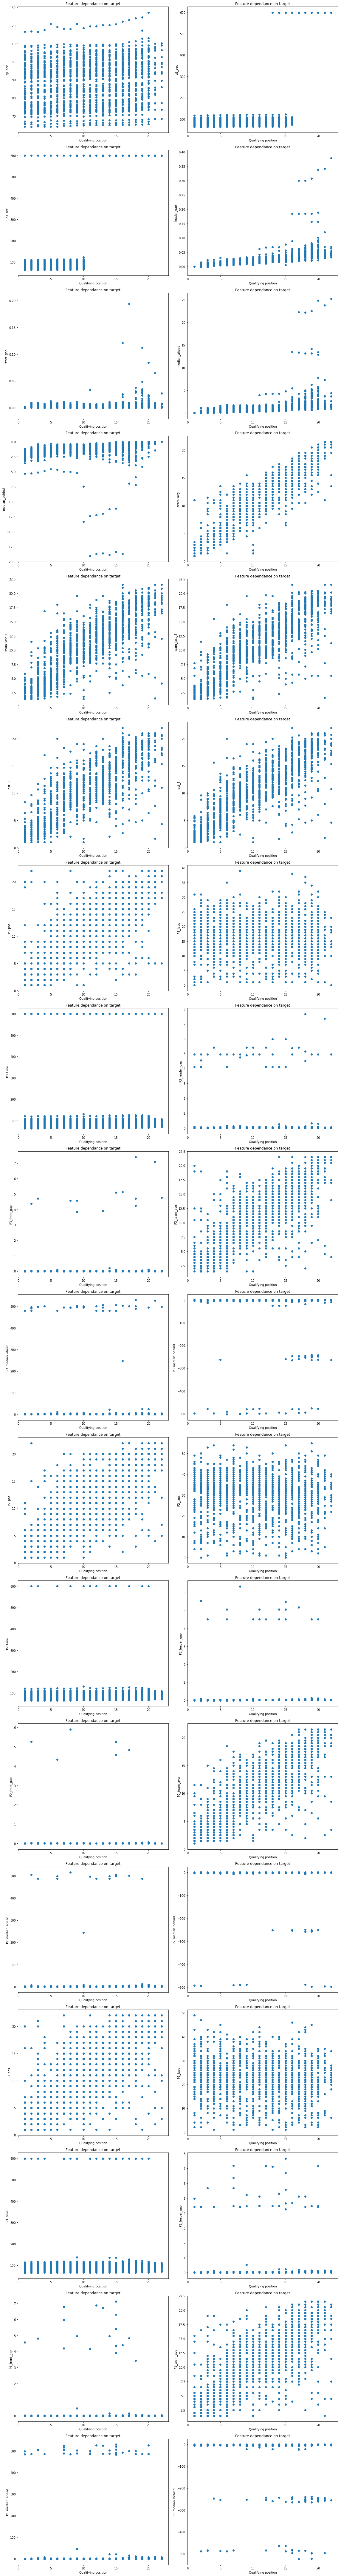

In [469]:
# Visualizing dependancies for all countable features for target feature (Q_pos)

features = ['q1_sec', 'q2_sec', 'q3_sec', 'leader_gap', 'front_gap', 'median_ahead', 'median_behind',
           'team_avg', 'team_last_3', 'team_last_5', 'last_3', 'last_5', 'P3_pos', 'P3_laps', 'P3_time', 
            'P3_leader_gap', 'P3_front_gap', 'P3_team_avg', 'P3_median_ahead', 'P3_median_behind', 'P2_pos', 
            'P2_laps', 'P2_time', 'P2_leader_gap', 'P2_front_gap', 'P2_team_avg', 'P2_median_ahead',
           'P2_median_behind', 'P1_pos', 'P1_laps', 'P1_time', 'P1_leader_gap', 'P1_front_gap', 'P1_team_avg', 
            'P1_median_ahead', 'P1_median_behind']

figure, axes = plt.subplots(nrows = 18, ncols = 2, figsize = (16, 120))

i = 0
for rows in axes:  
    for ax1 in rows:
        ax1.scatter(data['Q_pos'].values, data[features[i]].values)
        ax1.set_ylabel(features[i])
        ax1.set_xlabel('Qualifying position')
        ax1.set_title('Feature dependance on target')
        i += 1

plt.tight_layout()
plt.show()

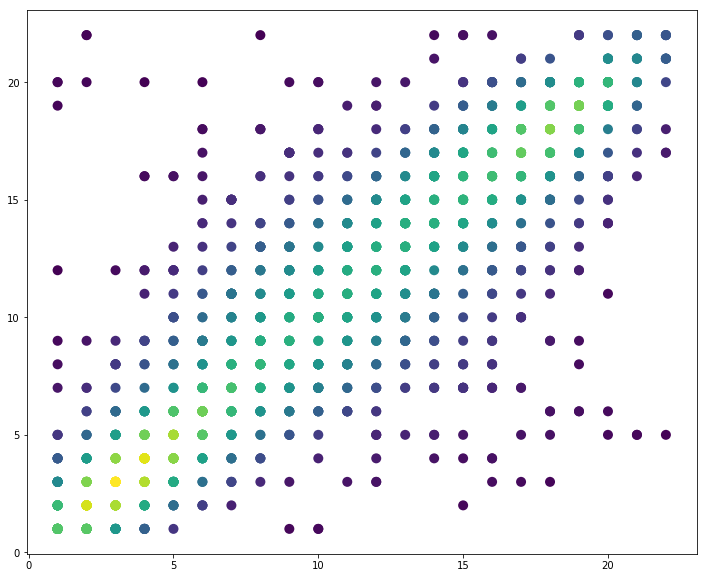

In [470]:
fig = plt.figure(figsize = (12, 10))

x = data['Q_pos'].values
y = data['P3_pos']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c = z, s = 100, edgecolor = '')
plt.show()

/home/idemidov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


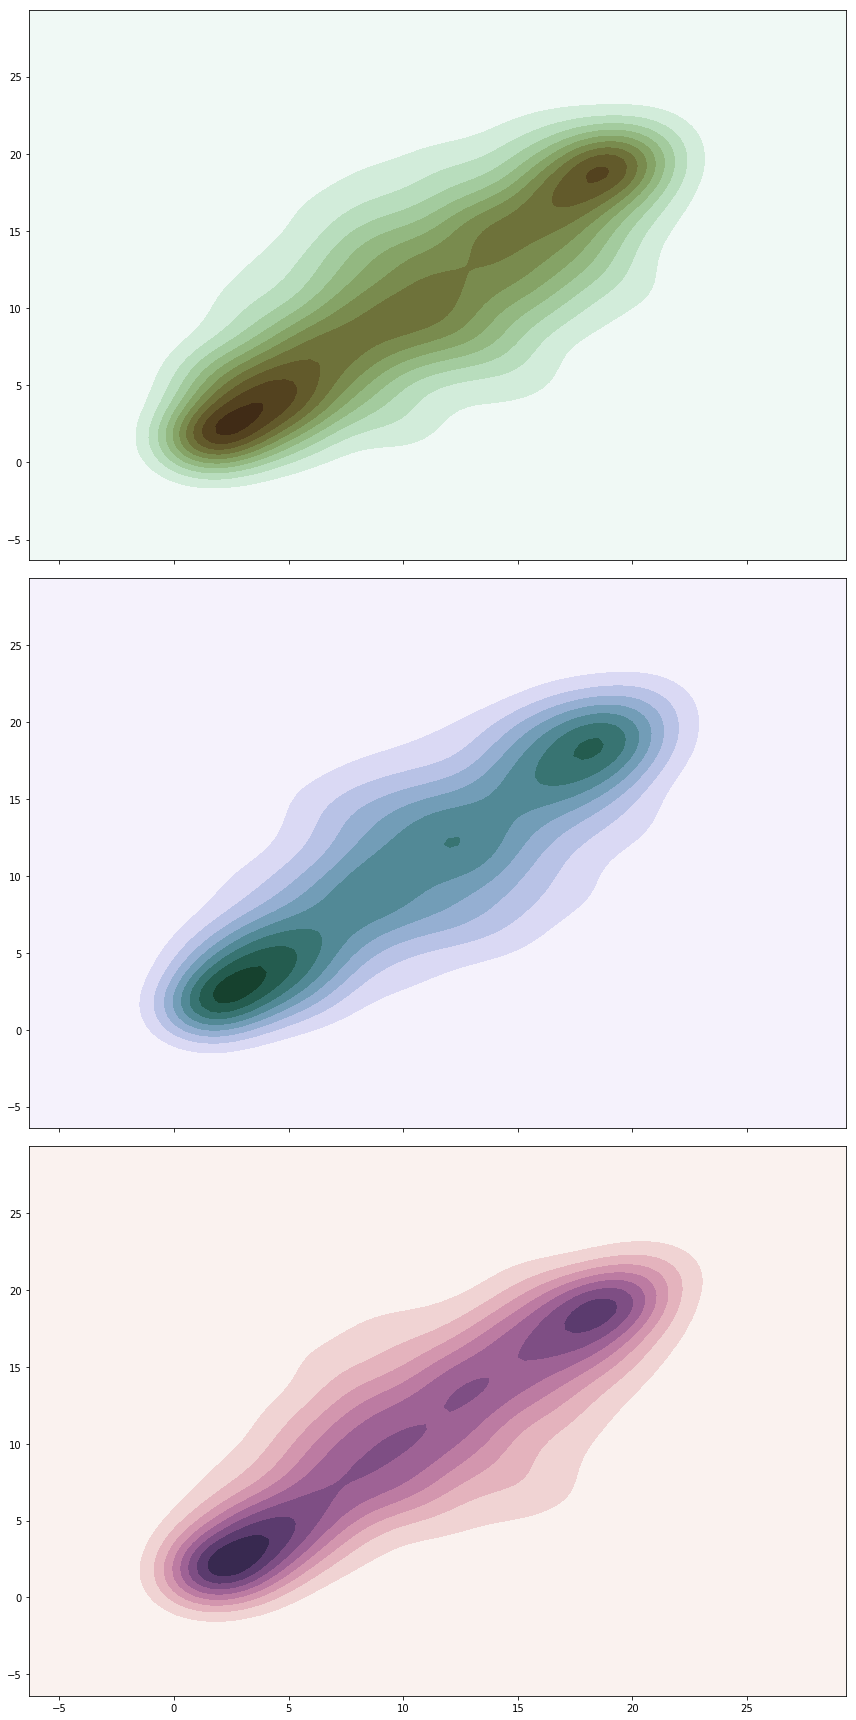

In [471]:
f, axes = plt.subplots(3, 1, figsize=(12, 24), sharex=True)

x = data['Q_pos'].values
y1 = data['P1_pos'].values
y2 = data['P2_pos'].values
y3 = data['P3_pos'].values

for ax, s, y in zip(axes.flat, np.linspace(1, 22, 23), [y1, y2, y3]):

    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)

f.tight_layout()

In [472]:
features = ['q1_sec', 'q2_sec', 'q3_sec', 'leader_gap', 'front_gap', 'median_ahead', 'median_behind',
           'team_avg', 'team_last_3', 'team_last_5', 'last_3', 'last_5', 'P3_pos', 'P3_laps', 'P3_time', 
            'P3_leader_gap', 'P3_front_gap', 'P3_team_avg', 'P3_median_ahead', 'P3_median_behind', 'P2_pos', 
            'P2_laps', 'P2_time', 'P2_leader_gap', 'P2_front_gap', 'P2_team_avg', 'P2_median_ahead',
           'P2_median_behind', 'P1_pos', 'P1_laps', 'P1_time', 'P1_leader_gap', 'P1_front_gap', 'P1_team_avg', 
            'P1_median_ahead', 'P1_median_behind']

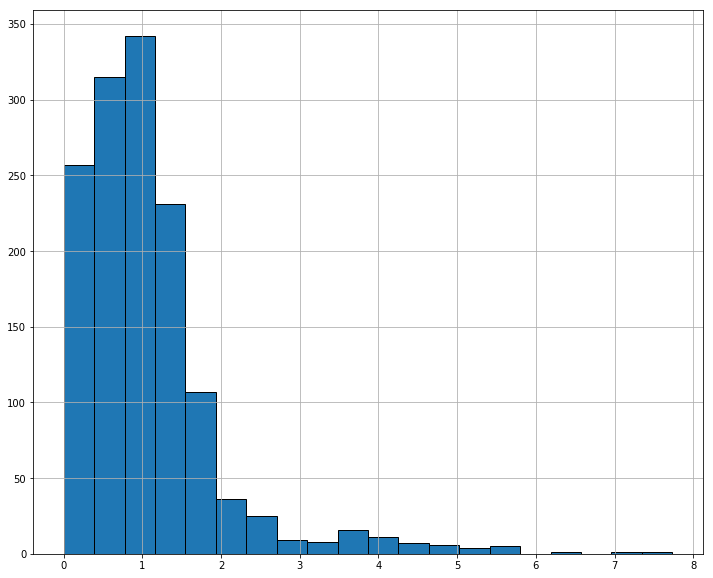

In [529]:
fig = plt.figure(figsize = (12, 10))

data['median_ahead'].hist(bins = 20, edgecolor = 'black')
plt.show()

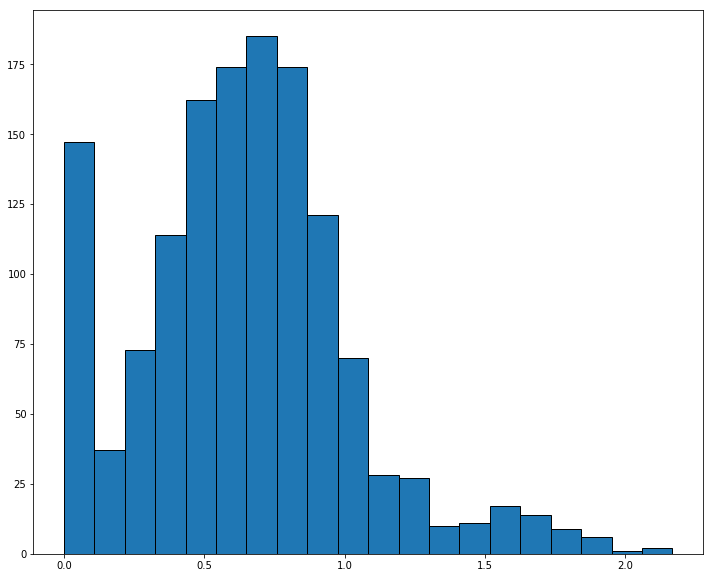

In [532]:
fig = plt.figure(figsize = (12, 10))

plt.hist(np.log(data['median_ahead'].values + 1), bins = 20, edgecolor = 'black')
plt.show()

In [533]:
# 11th race of 2016 season had rainy q1, so the results in q1 were really slow

data = data.drop(data[data['median_ahead'] > 12].index)

# Log for median_ahead could help

data.loc[:, 'median_ahead'] = np.log(data['median_ahead'].values + 1)

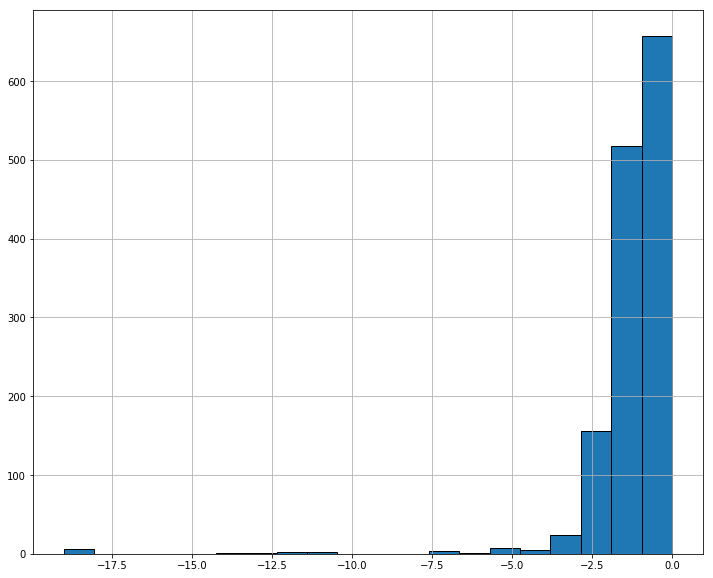

In [534]:
fig = plt.figure(figsize = (12, 10))

data['median_behind'].hist(bins = 20, edgecolor = 'black')
plt.show()

In [536]:
data[data['median_behind'] < -12.5][['driver', 'Q_pos', 'best_time', 'median_behind', 'race_no', 'season']]

,driver,Q_pos,best_time,median_behind,race_no,season
785,Kimi Räikkönen,14.0,85.435,-18.8360,11,2016
788,Valtteri Bottas,10.0,82.182,-13.3320,11,2016
790,Sergio Perez,13.0,85.416,-18.5830,11,2016
792,Esteban Gutierrez,15.0,86.189,-18.3540,11,2016
793,Romain Grosjean,11.0,84.941,-19.0240,11,2016
795,Daniil Kvyat,12.0,85.301,-18.6810,11,2016
796,Felipe Nasr,16.0,87.063,-18.7005,11,2016


In [537]:
data[(data['race_no'] == 11) & (data['season'] == 2016)][['driver', 'Q_pos', 'best_time', 'median_ahead', 'median_behind']]

,driver,Q_pos,best_time,median_ahead,median_behind
780,Lewis Hamilton,2.0,80.108,0.000894,-5.2505
781,Nico Rosberg,1.0,79.965,0.000000,-5.3360
782,Daniel Ricciardo,3.0,80.280,0.217930,-5.1360
783,Sebastian Vettel,5.0,80.874,0.518794,-4.5610
784,Max Verstappen,4.0,80.557,0.370874,-4.8685
785,Kimi Räikkönen,14.0,85.435,1.653263,-18.8360
786,Fernando Alonso,7.0,81.211,0.583611,-4.9780
787,Carlos Sainz,6.0,81.131,0.615726,-4.6810
788,Valtteri Bottas,10.0,82.182,0.836381,-13.3320
789,Nico Hulkenberg,9.0,81.823,0.745502,-5.2400


In [514]:
vals = np.log(data['front_gap'].values + 1)

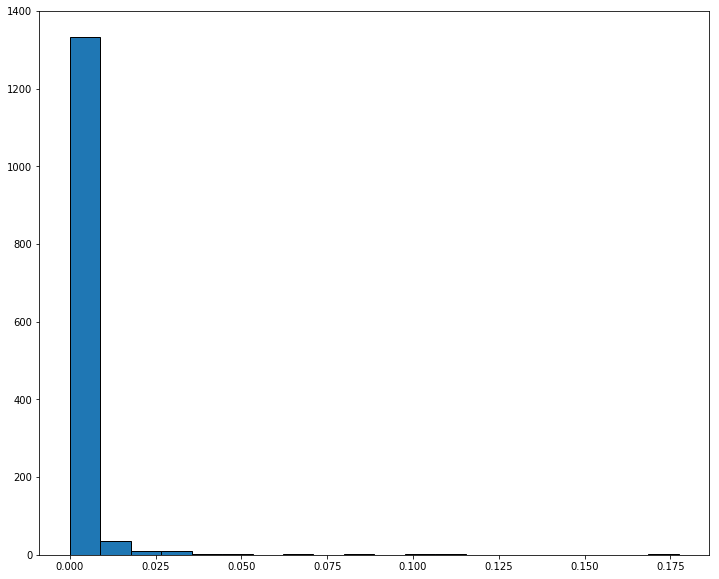

In [515]:
fig = plt.figure(figsize = (12, 10))

plt.hist(vals, bins = 20, edgecolor = 'black')

plt.show()

## Trying algorithms

In [548]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score

In [540]:
data.columns

Index(['pos', 'driver', 'team', 'laps', 'time', 'race_no', 'season', 'track',
       'engine', 'distance', 'Q_pos', 'q1', 'q2', 'q3', 'Q_laps', 'is_q2',
       'is_q3', 'q1_sec', 'q2_sec', 'q3_sec', 'best_time', 'leader_gap',
       'front_gap', 'best_time_order', 'median_ahead', 'median_behind',
       'team_avg', 'team_last_3', 'team_last_5', 'last_3', 'last_5', 'P3_pos',
       'P3_laps', 'P3_time', 'P3_leader_gap', 'P3_front_gap', 'P3_team_avg',
       'P3_median_ahead', 'P3_median_behind', 'P2_pos', 'P2_laps', 'P2_time',
       'P2_leader_gap', 'P2_front_gap', 'P2_team_avg', 'P2_median_ahead',
       'P2_median_behind', 'P1_pos', 'P1_laps', 'P1_time', 'P1_leader_gap',
       'P1_front_gap', 'P1_team_avg', 'P1_median_ahead', 'P1_median_behind'],
      dtype='object')

In [627]:
practice_cols = ['team_last_3', 'team_last_5', 'last_3', 'last_5', 'P3_pos',
       'P3_laps', 'P3_time', 'P3_leader_gap', 'P3_front_gap', 'P3_team_avg',
       'P3_median_ahead', 'P3_median_behind', 'P2_pos', 'P2_laps', 'P2_time',
       'P2_leader_gap', 'P2_front_gap', 'P2_team_avg', 'P2_median_ahead',
       'P2_median_behind', 'P1_pos', 'P1_laps', 'P1_time', 'P1_leader_gap',
       'P1_front_gap', 'P1_team_avg', 'P1_median_ahead', 'P1_median_behind']

quali_cols = ['Q_laps', 'is_q2', 'is_q3', 'q1_sec', 'q2_sec', 'q3_sec', 'best_time', 'leader_gap',
       'front_gap', 'best_time_order', 'median_ahead', 'median_behind', 'team_avg']

In [630]:
p_data = data[practice_cols].reset_index(drop = True)
p_target = data['Q_pos'].apply(lambda x: 1 if x < 11 else 0)

In [547]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

In [634]:
def modeller(dataset, labels):
    
    scores = []
    i = 1
    folds.get_n_splits(dataset, labels)
    
    for train_index, test_index in folds.split(dataset, labels):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        clf = RandomForestClassifier(n_estimators = 500)
        clf.fit(X_train, y_train)
        scores.append(roc_auc_score(clf.predict(X_test), y_test))
    
        print(f"Fold {i} - score {scores[-1]}")
        i += 1
        
    print(f"Mean score is {sum(scores) / len(scores)}")
    
    return clf.predict(dataset)

In [635]:
q_pred = modeller(p_data, p_target.values)

Fold 1 - score 0.8343631897203326
Fold 2 - score 0.827064479638009
Fold 3 - score 0.8642607771706132
Mean score is 0.8418961488429849


In [636]:
q_data = data[quali_cols].reset_index(drop = True)
q_data['Q_pred'] = q_pred
q_target = data['Q_pos'].apply(lambda x: 1 if x < 11 else 0)

In [637]:
r_pred = modeller(q_data, q_target.values)

Fold 1 - score 0.997844827586207
Fold 2 - score 0.997844827586207
Fold 3 - score 0.9481774264382961
Mean score is 0.98128902720357


In [642]:
X_train, x_test, y_train, y_test = train_test_split(q_data, q_target, test_size = 0.2, stratify = target, shuffle = True)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
roc_auc_score(y_test, clf.predict(x_test))

1.0

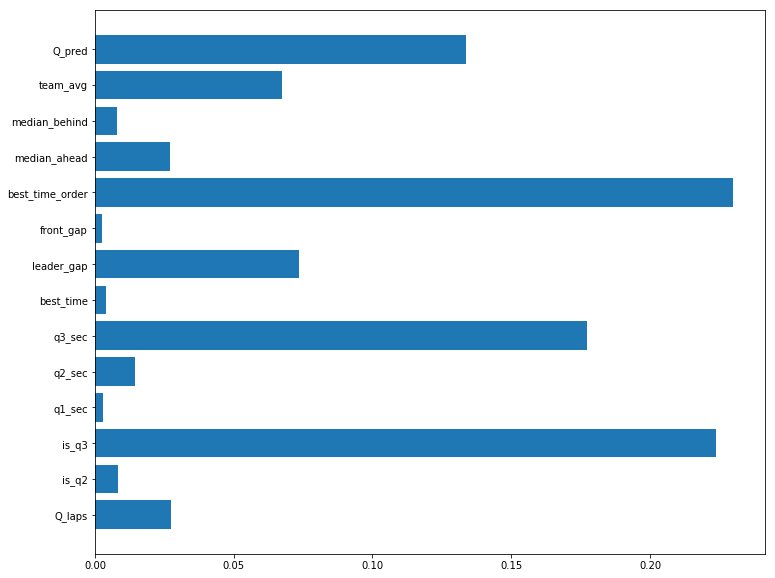

In [643]:
fig = plt.figure(figsize = (12, 10))

plt.barh(q_data.columns, clf.feature_importances_)

plt.show()